In [2]:
import tensorflow as tf


In [3]:
import tensorflow_datasets as tfds # pour charger les dataset

C:\Users\dell\anaconda3\envs\ComputerVision\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Q2- Load the pre-existing image dataset MNIST DIGIT.

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Q3- Explore the dataset (e.g., print the shapes of training and test sets and display a few sample images)

In [5]:
# Print the shapes of training and test sets
print("Number of training examples:", ds_info.splits['train'].num_examples)
print("Number of test examples:", ds_info.splits['test'].num_examples)

Number of training examples: 60000
Number of test examples: 10000


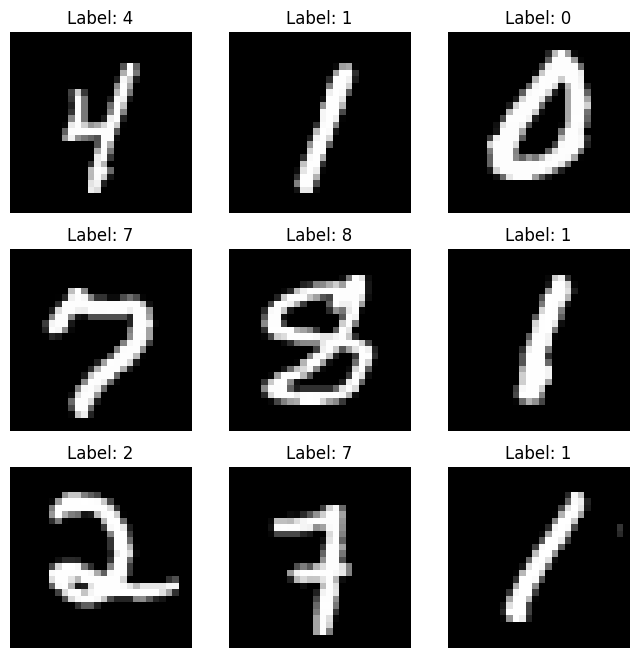

In [6]:

import matplotlib.pyplot as plt
# Display a few sample images from the training set
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = axes[i // 3, i % 3]
    ax.imshow(image.numpy(), cmap='gray')
    ax.set_title(f"Label: {label.numpy()}")
    ax.axis('off')

plt.show()

Q4- Preprocess the dataset by normalizing pixel values to the range [0, 1].

In [7]:
# Define a function to normalize pixel values to the range [0, 1]
def normalize_images(image, label):
    # Convert pixel values to float32 and normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply the normalization function to the datasets
#ds_train = ds_train.map(normalize_images)
#ds_test = ds_test.map(normalize_images)

# Print the shapes of the training and test sets after normalization
#print("Shape of the training set (images) after normalization:", ds_train)
#print("Shape of the test set (images) after normalization:", ds_test)

In [8]:
#Q5- Build a training pipeline and an evaluation pipeline by applying the following transformations: tf.data.Dataset.map, tf.data.Dataset.cache, tf.data.Dataset.shuffle, tf.data.Dataset.batch, and tf.data.Dataset.prefetch.

In [9]:
# Définir la taille des lots (batch size)
batch_size = 64

# Créer un pipeline de traitement de données pour l'entraînement
train_pipeline = ds_train.map(normalize_images)  # Normalisation deja fais dans question 4
train_pipeline = train_pipeline.cache()            # Mise en cache
train_pipeline = train_pipeline.shuffle(buffer_size=10000)  # Mélange aléatoire
train_pipeline = train_pipeline.batch(batch_size)  # Regroupement en lots
train_pipeline = train_pipeline.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Préchargement en arrière-plan

# Créer un pipeline de traitement de données pour l'évaluation
test_pipeline = ds_test.map(normalize_images)    # Normalisation
test_pipeline = test_pipeline.cache()              # Mise en cache
test_pipeline = test_pipeline.batch(batch_size)    # Regroupement en lots
test_pipeline = test_pipeline.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Préchargement en arrière-plan

2.Create, Train, and Evaluate the MLP Model

In [ ]:
#donnnes tabulaire comme .CSV
#ona L = 4 les input man7sbohimch

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(train_pipeline, epochs=6,validation_data=test_pipeline)

Epoch 1/6
938/938 [==============================] - 6s 6ms/step - loss: 0.2320 - sparse_categorical_accuracy: 0.9305 - val_loss: 0.1136 - val_sparse_categorical_accuracy: 0.9655
Epoch 2/6
938/938 [==============================] - 5s 6ms/step - loss: 0.0926 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.0833 - val_sparse_categorical_accuracy: 0.9748
Epoch 3/6
938/938 [==============================] - 6s 6ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9729
Epoch 4/6
938/938 [==============================] - 6s 6ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9846 - val_loss: 0.0882 - val_sparse_categorical_accuracy: 0.9732
Epoch 5/6
938/938 [==============================] - 5s 5ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9786
Epoch 6/6
938/938 [==============================] - 6s 6ms/step - loss: 0.0320 - sparse_categorical_accu

In [ ]:
afficher les courbe loss et acruse pour train et test

3.Create, Train, and Evaluate the CNN Model

In [20]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [21]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Ajouter des couches denses sur le dessus

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [ ]:
#Compiler et entraîner le modèle

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_pipeline, epochs=10, 
                    validation_data=(test_pipeline))

Epoch 1/10
938/938 [==============================] - 45s 47ms/step - loss: 0.1730 - accuracy: 0.9475 - val_loss: 0.0498 - val_accuracy: 0.9831
Epoch 2/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 3/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0367 - val_accuracy: 0.9872
Epoch 4/10
938/938 [==============================] - 46s 50ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 6/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 36s 38ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0282 - val_accuracy:

In [ ]:
#Évaluer le modèle

157/157 - 1s - loss: 0.0359 - accuracy: 0.9903 - 1s/epoch - 7ms/step


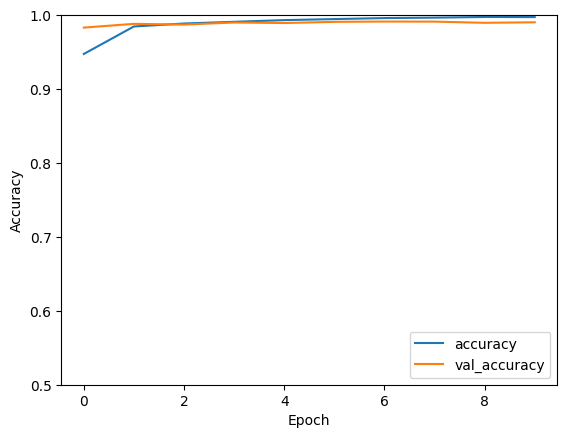

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_pipeline,  verbose=2)

In [33]:
print(test_acc)

0.9902999997138977


In [34]:
#Évaluer le modèle accuracy et loss

157/157 - 1s - loss: 0.0359 - accuracy: 0.9903 - 1s/epoch - 7ms/step
Test loss: 0.035940803587436676
Test accuracy: 0.9902999997138977


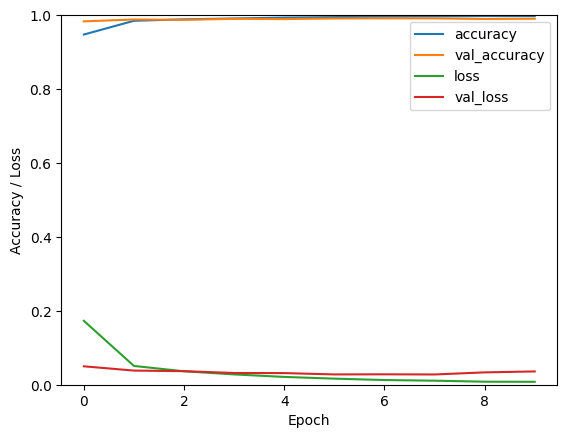

In [37]:
# Afficher les courbes d'exactitude
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

# Afficher les courbes de perte
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.ylim([0, 1])  # Ajustez la plage Y en fonction de vos données d'exactitude
plt.legend(loc='upper right')

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_pipeline, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Afficher le graphique
plt.show()
